In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [66]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [67]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [68]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Unique values in each column**

In [70]:
l1 = []
for i in df.columns:
  if df[i].dtypes not in [int,float]:
    print("Unique Values of " ,i , ":", df[i].unique() , "\n\n")
    l1.append(i)
l1

Unique Values of  job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 


Unique Values of  marital : ['married' 'single' 'divorced' 'unknown'] 


Unique Values of  education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 


Unique Values of  default : ['no' 'unknown' 'yes'] 


Unique Values of  housing : ['no' 'yes' 'unknown'] 


Unique Values of  loan : ['no' 'yes' 'unknown'] 


Unique Values of  contact : ['telephone' 'cellular'] 


Unique Values of  month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 


Unique Values of  day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri'] 


Unique Values of  poutcome : ['nonexistent' 'failure' 'success'] 


Unique Values of  y : ['no' 'yes'] 




['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### **Visualizing Columns**

Text(0.5, 1.0, 'education')

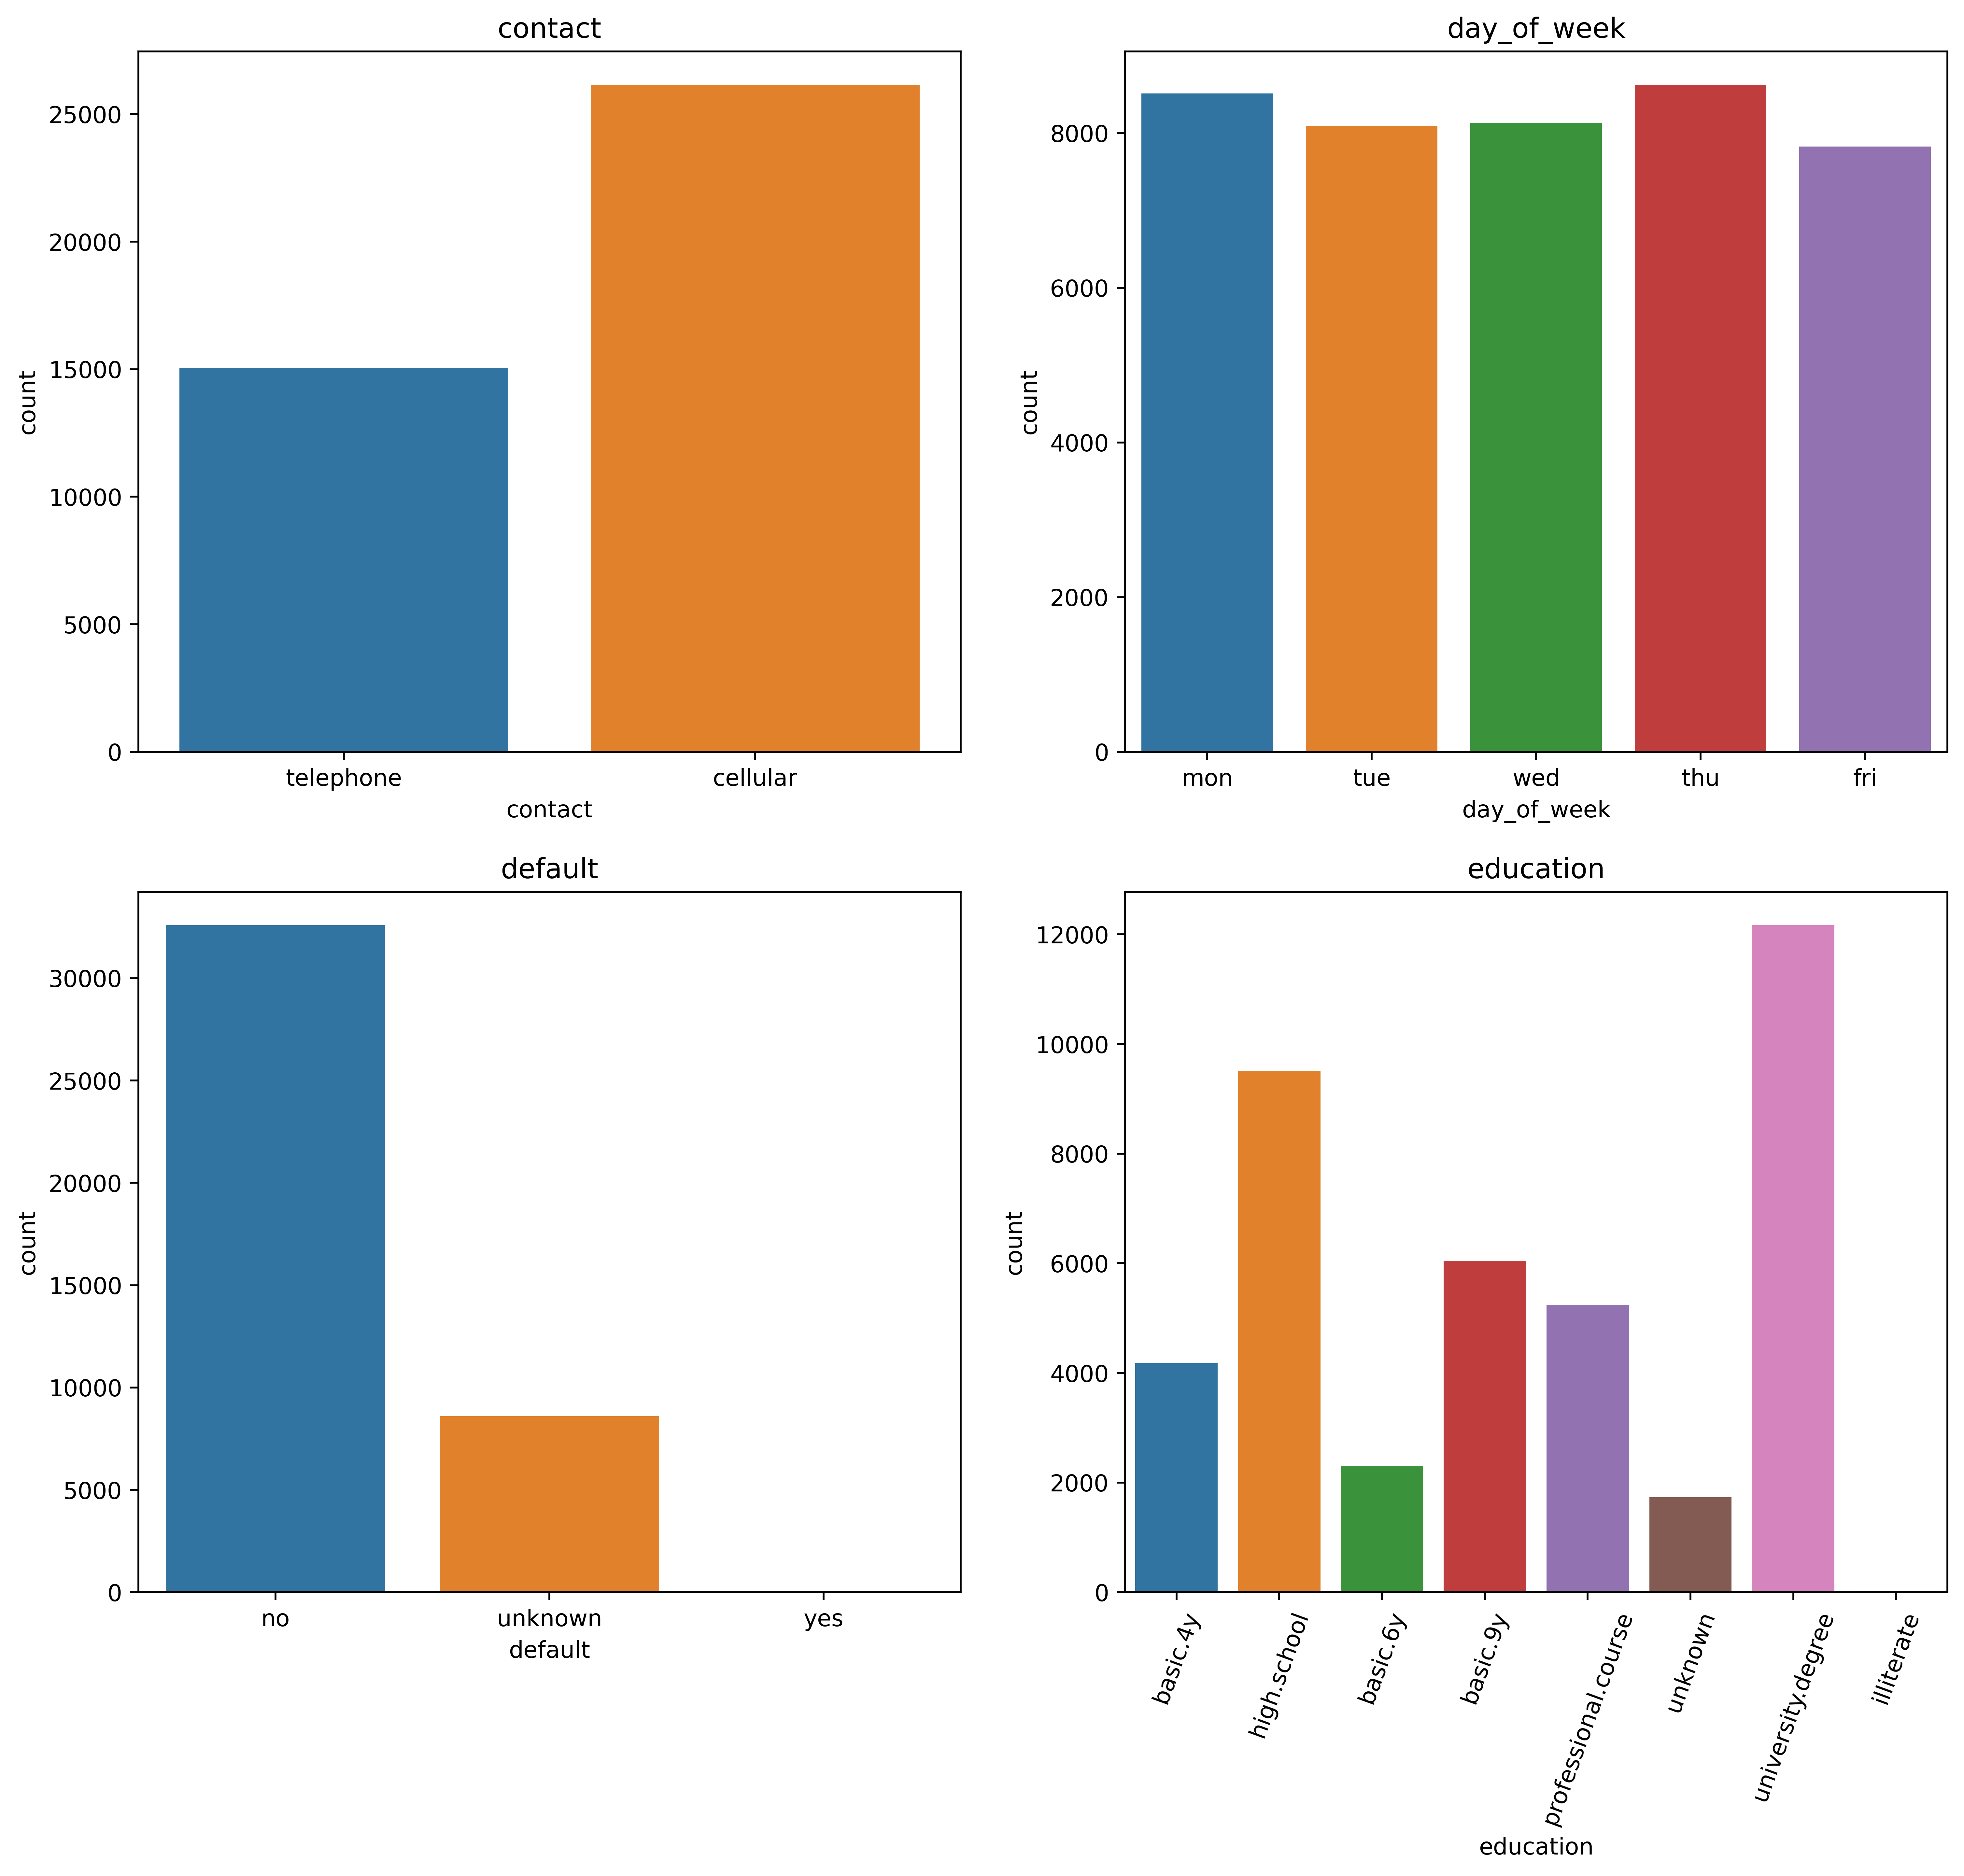

In [71]:
plt.figure(figsize=(14, 12), dpi=512)
plt.subplot(221)
sns.countplot(x='contact', data=df)
plt.title("contact")

plt.subplot(222)
sns.countplot(x='day_of_week', data=df)
plt.title("day_of_week")

plt.subplot(223)
sns.countplot(x='default', data=df)
plt.title("default")

plt.subplot(224)
sns.countplot(x='education', data=df)
plt.xticks(rotation=70)
plt.title("education")

In [72]:
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='housing', data=df)
plt.title("housing")

plt.subplot(222)
sns.countplot(x='job', data=df)
plt.xticks(rotation=70)
plt.title("job")

plt.subplot(223)
sns.countplot(x='loan', data=df)
plt.title("loan")

plt.subplot(224)
sns.countplot(x='marital', data=df)
plt.xticks(rotation=70)
plt.title("marital")

Text(0.5, 1.0, 'marital')

In [73]:
from sklearn.preprocessing import LabelEncoder

df[l1] = df[l1].apply(LabelEncoder().fit_transform)

In [74]:
X = df.drop(['y'], axis=1)
y = df['y']

In [75]:
class_0 = len(df[df['y'] == 0])
print(class_0)

36548


In [76]:
class_1 = len(df[df['y'] == 1])
print(class_1)

4640


Text(0.5, 1.0, "Classes 0 and 1 for 'y'")

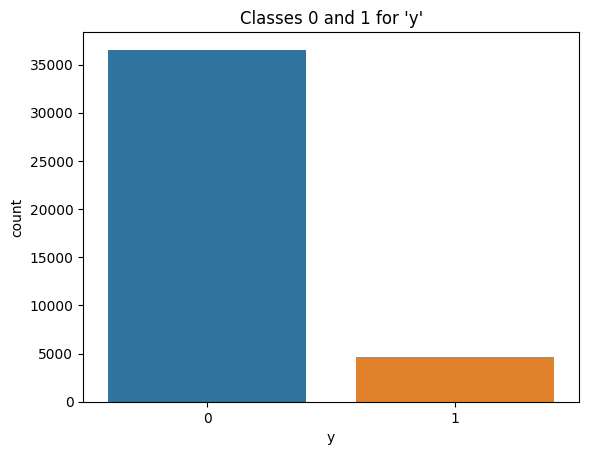

In [77]:
sns.countplot(x='y', data=df)
plt.title("Classes 0 and 1 for 'y'")


### **Balancing classes from 'y'**

In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [79]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.00000,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.00000,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.00000,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.00000,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.100000,93.994000,-36.400000,4.857000,5191.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,66,10,0,6,1,1,0,0,8,4,...,1,6,2,2,-1.100000,94.240393,-38.735613,0.890812,4963.60000,1
73092,62,1,0,6,0,2,0,0,6,3,...,1,999,0,0,-3.309006,92.495151,-28.287658,0.732493,5018.86491,1
73093,31,0,2,4,0,1,0,0,0,3,...,2,999,0,1,-1.800000,93.075000,-47.100000,1.394323,5099.10000,1
73094,31,7,2,5,0,1,0,0,7,3,...,1,999,0,1,-3.400000,92.496858,-27.866729,0.730656,5017.50000,1


In [80]:
len(df[df['y'] == 0])

36548

In [81]:
len(df[df['y'] == 1])

36548

Text(0.5, 1.0, "Classes 0 and 1 for 'y'")

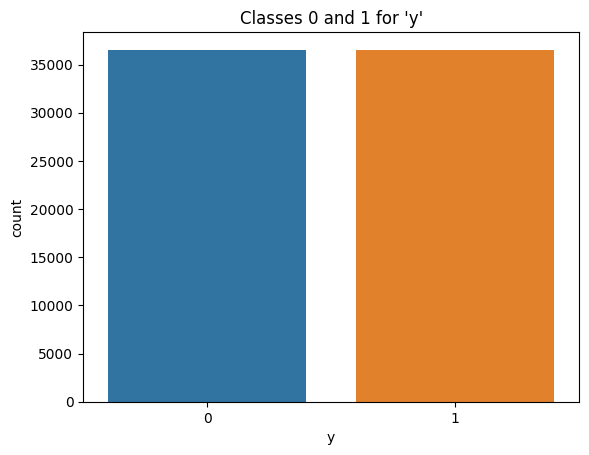

In [82]:
sns.countplot(x='y', data=df)
plt.title("Classes 0 and 1 for 'y'")


### **Decision tree Classifier**

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [84]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [85]:
# Accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

0.9307759658531246

In [86]:
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Precision : 0.924167027260926
Recall    : 0.9380696167783024
F1-score  : 0.9310664268977168


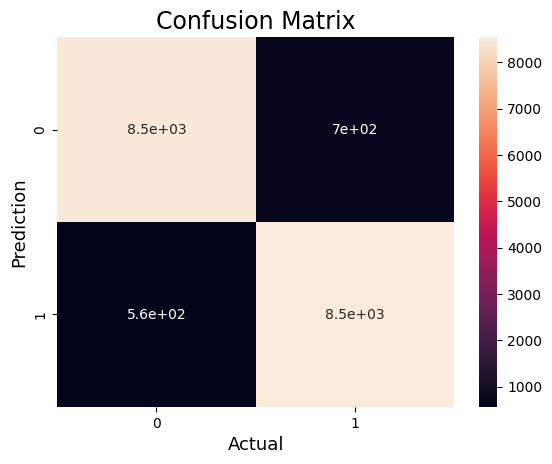

In [87]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()